In [1]:
from rfpipe import candidates, state, metadata
import pylab as plt
import numpy as np
import glob
%matplotlib inline

/lustre/aoc/observers/nm-10222/anaconda3/envs/temp/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/lustre/aoc/observers/nm-10222/anaconda3/envs/temp/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [15]:
def get_orig_state(cc):
    sdm = cc.metadata.filename
    preffile = '/lustre/aoc/observers/nm-10222/fetchrf/scripts/realfast.yml'
    gainpath = '/home/mchammer/evladata/telcal/2019/12/'
    bdfdir = metadata.get_bdfdir(sdmfile=sdm, sdmscan=1)
    band = metadata.sdmband(sdmfile=sdm, sdmscan=1, bdfdir=bdfdir)
    st_orig = state.State(sdmfile=sdm, sdmscan=1, preffile=preffile, 
                     name='NRAOdefault'+band, showsummary=False, bdfdir=bdfdir)
    return st_orig

def make_snr_dm_plot(cc, st_orig):
    dmarr_orig = np.array(st_orig.dmarr)
    c_dms = cc.canddm[np.where(cc.canddm > 0)]
    c_snrs = cc.snrtot[np.where(cc.canddm > 0)]
    c_snr_max = c_snrs[c_snrs == c_snrs.max()][0]
    c_dm_max_snr = c_dms[c_snrs == c_snrs.max()][0]

    dms = dmarr_orig[(dmarr_orig < c_dms.max()) & (dmarr_orig > c_dms.min())]
    plt.figure()
    fig,ax = plt.subplots(1, figsize=(10,8))
    ax.scatter(c_dms,c_snrs, s=15)
    for dm in dms:
        plt.axvline(x=dm, color='k', marker='.', alpha=0.5, label=f'line at x = {dm}') # Markers for dms in original dmarray
    plt.xlabel('DM')
    plt.ylabel('SNR')
    plt.legend()
    title = cc.metadata.datasetId+f'\n Source: {cc.metadata.source}'+f'\n maxsnr: {c_snr_max:.2f} at dm: {c_dm_max_snr:.4f}'
    plt.title(title)
    plt.grid()
    plt.show()

In [16]:
pkls = glob.glob('fine_dm/*pkl')

2020-01-13 09:35:03,732 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1
2020-01-13 09:35:03,790 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 09:35:03,809 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1


<Figure size 432x288 with 0 Axes>

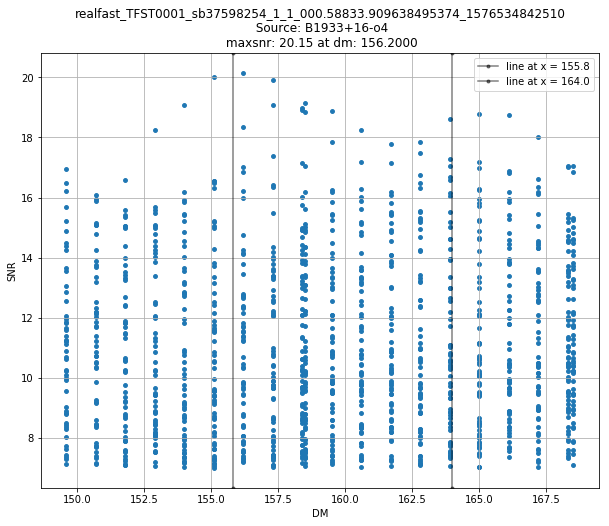

2020-01-13 09:35:04,250 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533804760, scan 1
2020-01-13 09:35:04,309 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 09:35:04,328 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533804760, scan 1


<Figure size 432x288 with 0 Axes>

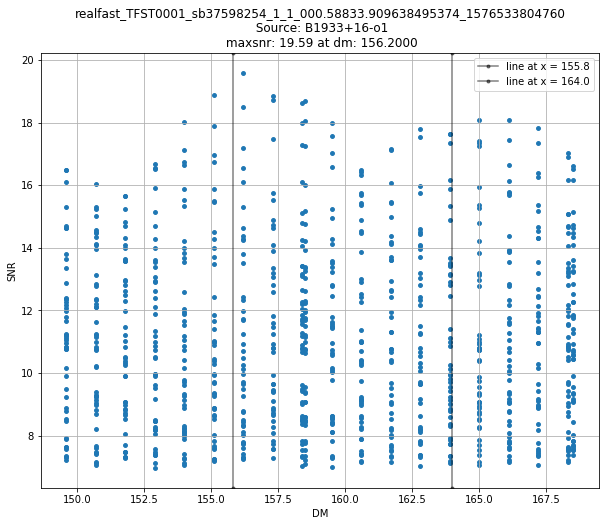

2020-01-13 09:35:04,762 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533418790, scan 1
2020-01-13 09:35:04,816 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 09:35:04,927 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576533418790, scan 1


<Figure size 432x288 with 0 Axes>

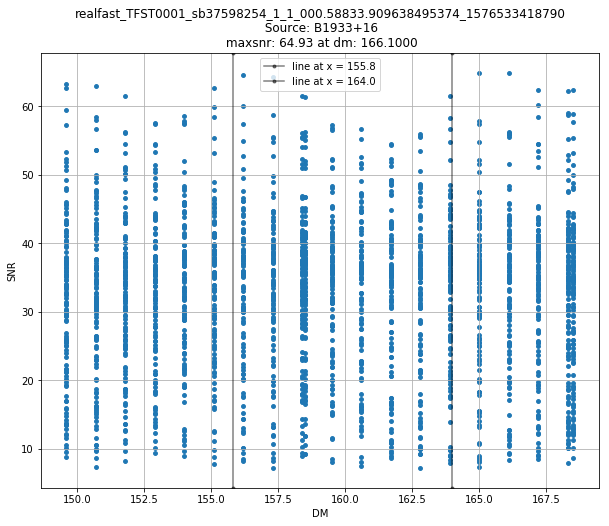

2020-01-13 09:35:05,435 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534279350, scan 1
2020-01-13 09:35:05,499 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 09:35:05,518 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534279350, scan 1


<Figure size 432x288 with 0 Axes>

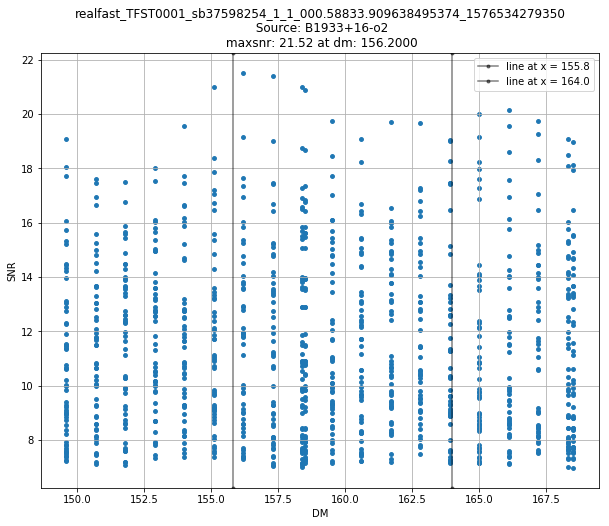

2020-01-13 09:35:05,974 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534691780, scan 1
2020-01-13 09:35:06,029 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-13 09:35:06,050 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534691780, scan 1


<Figure size 432x288 with 0 Axes>

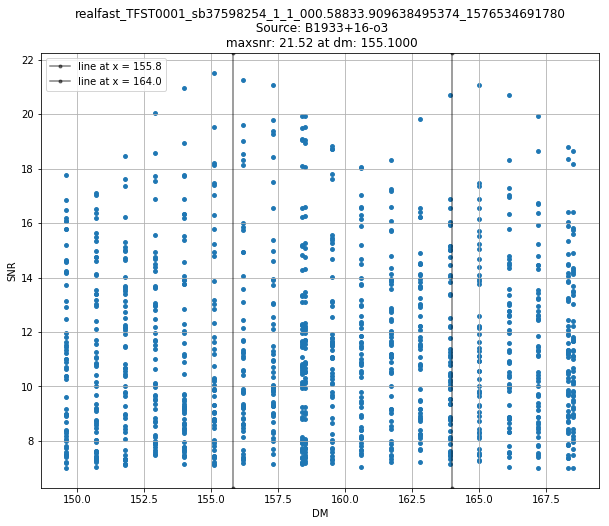

In [17]:
for pkl in pkls:
    ccs = list(candidates.iter_cands(pkl, select='candcollection'))
    assert len(ccs) == 1
    cc = ccs[0]
    st_orig = get_orig_state(cc)
    make_snr_dm_plot(cc, st_orig)